In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

c:\Users\passa\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\passa\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


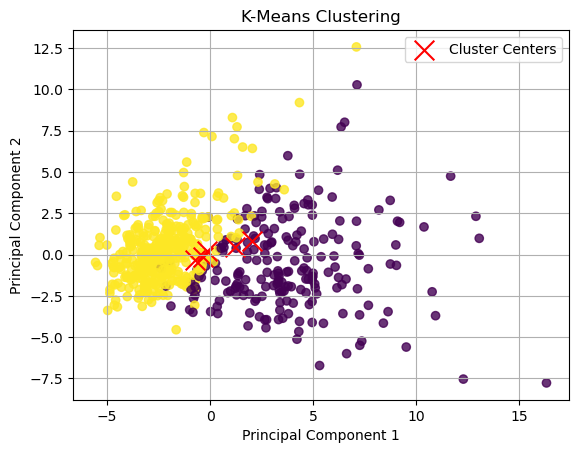

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a KMeans object with the number of clusters (k) you want
kmeans = KMeans(n_clusters=5)

# Fit the KMeans model to your data
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_


# lets plot the principal components as well 

# ok, lets do PCA on all the features in the dataset 
pca = PCA(n_components=30)
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='viridis', alpha=0.8)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Results
We see several cluster centers around a hypothetical decision boundary, implying that there might be features that have low variance, making it hard to differentiate still. In summary, clustering around a decision boundary indicates that there is some ambiguity in the data, making it difficult for the clustering algorithm to make clear distinctions between clusters. If we used less clusters, we may get better separation. 